In [1]:

import numpy as np 
import pandas as pd 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = mnist.load_data()


x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.


x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))



input_img = Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy', metrics=["accuracy"])



In [112]:
print("Autoencoder Model Structure:")
autoencoder.summary()

Autoencoder Model Structure:


Model: "functional_81"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_38 (InputLayer)     │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_70 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_71 (Dense)                │ (None, 784)            │       101,136 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 201,616 (787.56 KB)

 Trainable params: 201,616 (787.56 KB)

 Non-trainable params: 0 (0.00 B)

In [113]:
history = autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True
                , validation_split=0.1)

Epoch 1/50
211/211 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.0112 - loss: 0.3235 - val_accuracy: 0.0142 - val_loss: 0.1402
Epoch 2/50
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0117 - loss: 0.1305 - val_accuracy: 0.0125 - val_loss: 0.1083
Epoch 3/50
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0105 - loss: 0.1040 - val_accuracy: 0.0138 - val_loss: 0.0939
Epoch 4/50
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0129 - loss: 0.0912 - val_accuracy: 0.0128 - val_loss: 0.0859
Epoch 5/50
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0127 - loss: 0.0837 - val_accuracy: 0.0113 - val_loss: 0.0806
Epoch 6/50
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0131 - loss: 0.0788 - val_accuracy: 0.0143 - val_loss: 0.0772
Epoch 7/50
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0130 - loss: 0.0759 - val_accuracy: 0.0132 - val_loss: 0.0749
Epoch 8/50
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0136 - loss: 0.0737 - val_accuracy: 0.

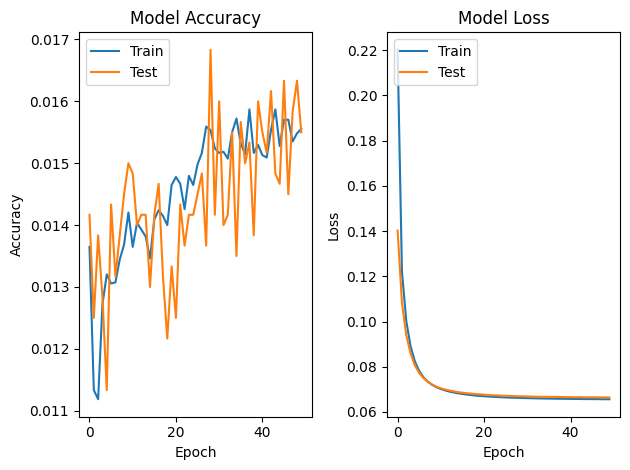

In [114]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


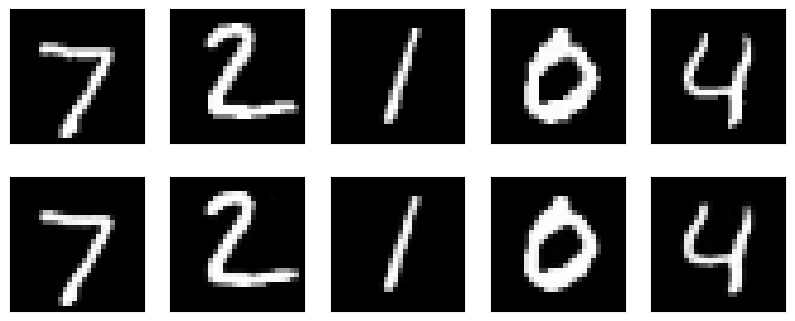

In [115]:
decoded_imgs = autoencoder.predict(x_test[:5])


n = 5
plt.figure(figsize=(10, 4))
for i in range(n):
   
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [116]:
encoder = Model(input_img, encoded)

In [ ]:
encoded_input = Input(shape=(128,))
decoder_layer = autoencoder.layers[-1]

hidden_layer  = Dense(100, activation='softmax')(encoded_input)
classifier_layer = Dense(10, activation='softmax')(hidden_layer)

classifier_model = Model(encoded_input, classifier_layer)

classifier_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [40]:
print("\nClassifier Model Structure:")
classifier_model.summary()



Classifier Model Structure:


Model: "functional_41"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_13 (InputLayer)     │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 100)            │        12,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,910 (54.34 KB)

 Trainable params: 13,910 (54.34 KB)

 Non-trainable params: 0 (0.00 B)

In [41]:
history = classifier_model.fit(encoder.predict(x_train), y_train,
                     epochs=50,
                     batch_size=256
                     , validation_data=(encoder.predict(x_test),y_test))


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.3046 - loss: 2.2036 - val_accuracy: 0.6394 - val_loss: 1.8856
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6460 - loss: 1.7976 - val_accuracy: 0.6596 - val_loss: 1.5587
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6581 - loss: 1.4962 - val_accuracy: 0.7051 - val_loss: 1.3120
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7041 - loss: 1.2683 - val_accuracy: 0.7389 - val_loss: 1.1078
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7407 - loss: 1.0693 - val_accuracy: 0.7550 - val_loss: 0.9455
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7535 - loss: 0.9294 - val_accuracy: 0.7568 - val_loss: 0.8350
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7560 - loss: 0.8252 - val_accuracy: 0.7665 - val_loss: 0.7563
Epoch 8/50
235/235 ━

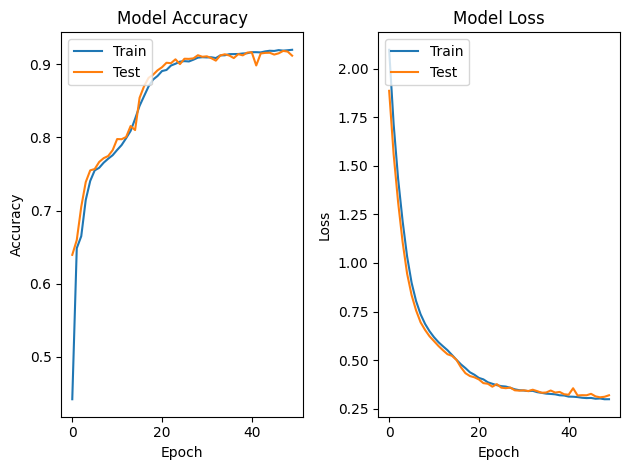

In [42]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


In [43]:
loss, accuracy = classifier_model.evaluate(encoder.predict(x_test), y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9018 - loss: 0.3625


Stacked autoencoder

In [129]:
encoded_imgs = encoder.predict(x_train)
encoded_input = Input(shape=(128,))
encoded_2 = Dense(64, activation='relu')(encoded_input)  # 32 hidden units
decoded_output = Dense(128, activation='relu')(encoded_2)
autoencoder_2 = Model(encoded_input, decoded_output)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


In [130]:
autoencoder_2.compile(optimizer='adam', loss='binary_crossentropy', metrics=["accuracy"])


In [131]:
print("\Model Structure:")
autoencoder_2.summary()


\Model Structure:


Model: "functional_93"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_42 (InputLayer)     │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_78 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_79 (Dense)                │ (None, 128)            │         8,320 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,576 (64.75 KB)

 Trainable params: 16,576 (64.75 KB)

 Non-trainable params: 0 (0.00 B)

In [132]:
autoencoder_2.fit(encoded_imgs, encoded_imgs,
                                 epochs=50,
                                 batch_size=256,
                                 shuffle=True)

Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.0048 - loss: -27.3697
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0068 - loss: -44.8013
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0068 - loss: -44.9183
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0062 - loss: -44.8196
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0070 - loss: -44.8630
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0066 - loss: -44.9191
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0067 - loss: -44.7419
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0070 - loss: -44.9859
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0061 - loss: -44.7401
Epoch 10/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0070 - loss: -44.8343
Epoch 11/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0068 - loss: -44.8737
Epoch 12/50
235/235 ━━━━━━━━━━

In [133]:
encoded_x_train = encoder.predict(x_train)
encoded_x_test = encoder.predict(x_test)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [134]:
encoder2 = Model(encoded_input, encoded_2)


In [135]:
encoded_encoded_x_train = encoder2.predict(encoded_x_train)
encoded_encoded_x_test = encoder2.predict(encoded_x_test)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [136]:
encoded_encoded_x_train.shape

(60000, 64)

In [137]:
encoded_input_2 = Input(shape=(64,))
decoder_layer_2 = autoencoder_2.layers[-1]

hidden_layer  = Dense(100, activation='softmax')(encoded_input_2)
classifier_layer = Dense(10, activation='softmax')(hidden_layer)

classifier_model = Model(encoded_input_2, classifier_layer)

classifier_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [139]:
history = classifier_model.fit(encoded_encoded_x_train, y_train,
                     epochs=100,
                     batch_size=256
                     , validation_data=(encoded_encoded_x_test,y_test))

Epoch 1/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7850 - loss: 0.6815 - val_accuracy: 0.7951 - val_loss: 0.6427
Epoch 2/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7882 - loss: 0.6744 - val_accuracy: 0.7962 - val_loss: 0.6382
Epoch 3/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7864 - loss: 0.6715 - val_accuracy: 0.7927 - val_loss: 0.6377
Epoch 4/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7871 - loss: 0.6782 - val_accuracy: 0.7968 - val_loss: 0.6323
Epoch 5/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7911 - loss: 0.6630 - val_accuracy: 0.7914 - val_loss: 0.6431
Epoch 6/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7925 - loss: 0.6621 - val_accuracy: 0.7996 - val_loss: 0.6288
Epoch 7/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7901 - loss: 0.6662 - val_accuracy: 0.7893 - val_loss: 0.6638
Epoch 8/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7938 - loss: 0.6572 - val_accu

The autoencoder is trained on the MNIST dataset to reconstruct the input images.
It consists of an encoder and a decoder.
The encoder compresses the input images into a latent space representation (128-dimensional vector), while the decoder reconstructs the images from this representation.
The autoencoder is trained for 50 epochs using the binary cross-entropy loss function and the Adam optimizer.
Training and validation loss and accuracy are plotted over epochs to visualize the model's performance.
After training, the autoencoder is evaluated on the test dataset, and the reconstructed images are visualized alongside the original images.

A classifier is built on top of the encoder to classify the compressed representations of the input images.
The encoder's output is fed into a dense layer with 100 units followed by a 10-unit softmax layer for classification.
The classifier is trained for 50 epochs using the sparse categorical cross-entropy loss function and the Adam optimizer.
Training and validation accuracy and loss are plotted over epochs to assess the classifier's performance.
The classifier is evaluated on the test dataset, and its accuracy is reported.

Another autoencoder is built on top of the compressed representations obtained from the first autoencoder.
This second autoencoder further compresses the representations from 128 to 64 dimensions using an additional hidden layer.
The second autoencoder is trained for 50 epochs to reconstruct the compressed representations.
The reconstructed representations are then used to train another classifier similar to the previous one.
This classifier is trained for 100 epochs and evaluated on the test dataset.